In [9]:
import inspect
from supervised_models import DeepClassification, classifiers_competition, ensemble_targets
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter as sgf
import warnings
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
warnings.simplefilter("ignore")

# You need to fill here

In [12]:
# insert your CSV file
df = pd.read_csv("Pseudomonas.csv")

# choose classifier - 0 for Linear SVM;
#                     1 for Quadratic SVM;
#                     2 for Cubic SVM;
#                     3 for Random Forest;
#                     4 for XGBoost;
Classifier = 3

# choose sacrifice rate - range from 0.00 to 0.99
Sacrifice = 0.00

# choose maximum difference between Sensitivity and Specificity - range from 0.00 to 0.99
delta = 0.25

In [13]:
df.head()

,ceftazidime,ciprofloxacin,gentamicin,1801.264,1799.335,1797.407,1795.478,1793.55,1791.621,1789.693,...,916.06,914.132,912.203,910.275,908.346,906.418,904.489,902.561,900.632,898.703
0,S,S,S,0.001056,0.000900,0.000769,0.000649,0.000553,0.000459,0.000401,...,0.002423,0.002248,0.001942,0.001543,0.001117,0.000730,0.000440,0.000297,0.000301,0.000401
1,R,S,S,0.001112,0.000950,0.000821,0.000699,0.000606,0.000518,0.000459,...,0.003170,0.002944,0.002554,0.002046,0.001512,0.001032,0.000669,0.000454,0.000394,0.000459
2,S,S,S,0.001004,0.000861,0.000744,0.000639,0.000560,0.000483,0.000433,...,0.002120,0.001992,0.001734,0.001385,0.001014,0.000685,0.000449,0.000326,0.000331,0.000433
3,S,S,S,0.000869,0.000728,0.000620,0.000517,0.000451,0.000395,0.000369,...,0.003125,0.002893,0.002500,0.002001,0.001479,0.001005,0.000638,0.000409,0.000325,0.000369
4,S,R,S,0.000965,0.000824,0.000722,0.000627,0.000554,0.000472,0.000407,...,0.003638,0.003357,0.002900,0.002321,0.001693,0.001122,0.000699,0.000449,0.000364,0.000407


In [14]:
X = df.select_dtypes(include="float").values
classes = list(df.select_dtypes(exclude="float").columns.values)
X.shape

(353, 469)

In [15]:
classes

['ceftazidime', 'ciprofloxacin', 'gentamicin']

In [16]:
X_der = sgf(X, window_length=13, polyorder=3, deriv=2, mode="nearest")

In [17]:
classifiers =[[{'cls': SVC(probability=True), 'name': 'lSVM'}, {'parametrs': {}}],
              [{'cls': SVC(probability=True, kernel="poly", degree=2), 'name': 'qSVM'}, {'parametrs': {}}],
              [{'cls': SVC(probability=True, kernel="poly", degree=3), 'name': 'cSVM'}, {'parametrs': {}}],
              [{'cls': RandomForestClassifier(n_estimators=1000), 'name': 'Random Forest'}, {'parametrs': {}}],
              [{'cls': XGBClassifier(n_estimators=1000), 'name': 'XGBoost'}, {'parametrs': {}}]]

# Results

\//\//\//\//\//\//\//\//\//\//\//\//\//\// ceftazidime \//\//\//\//\//\//\//\//\//\//\//\//\//\//


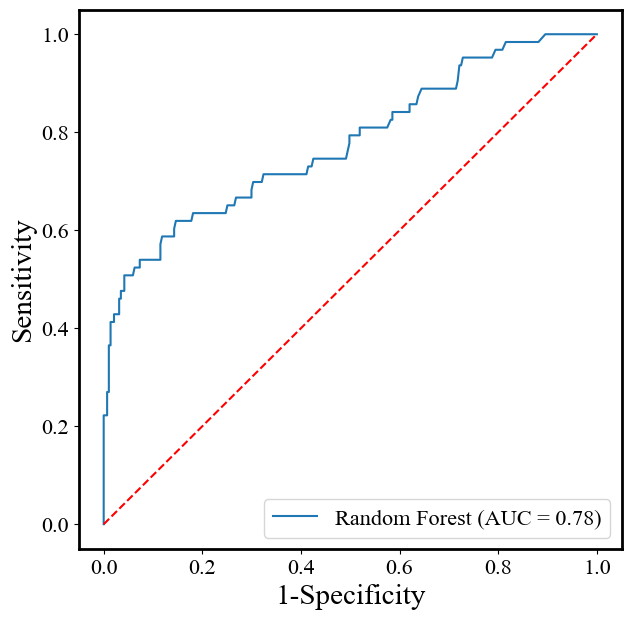

{'auc': 0.78, 'acc': 0.72, 'recall_1': 0.75, 'recall_2': 0.57, 'precision_1': 0.89, 'precision_2': 0.33}


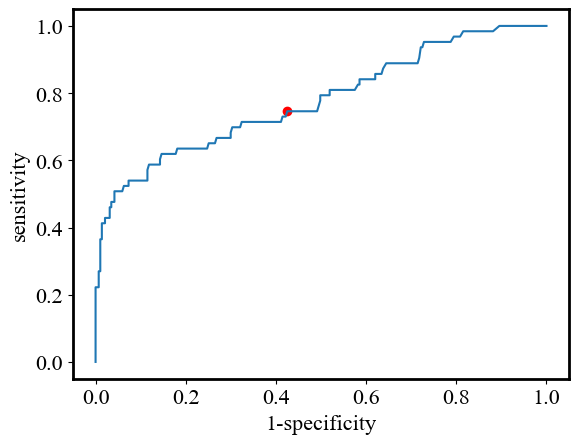

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       287
           1       0.63      0.52      0.57        63

    accuracy                           0.86       350
   macro avg       0.77      0.73      0.75       350
weighted avg       0.85      0.86      0.85       350

{'feature_selection_method': SelectKBest(k=150, score_func=<function chi2 at 0x1396e9d30>), 'feature_selection_method__k': 150}
[[268  19]
 [ 30  33]]
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
\//\//\//\//\//\//\//\//\//\//\//\//\//\// ciprofloxacin \//\//\//\//\//\//\//\//\//\//\//\//\//\//


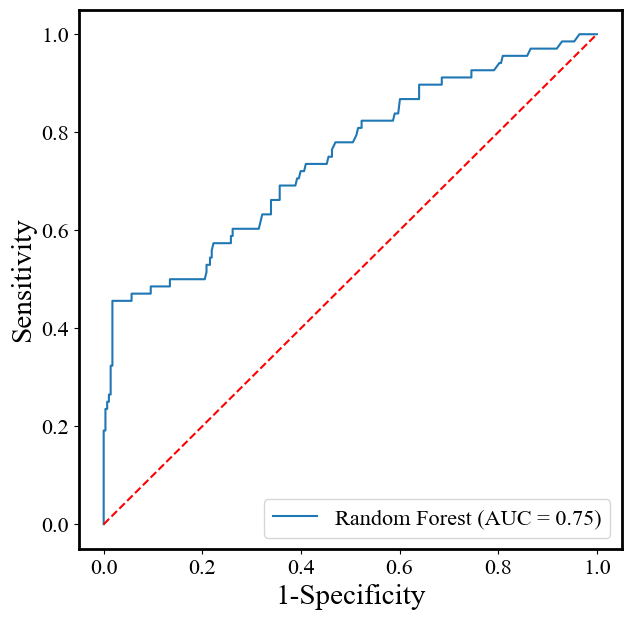

{'auc': 0.75, 'acc': 0.73, 'recall_1': 0.78, 'recall_2': 0.53, 'precision_1': 0.87, 'precision_2': 0.37}


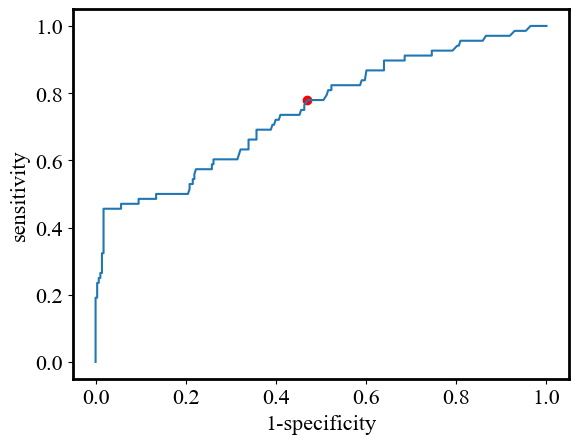

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       283
           1       0.30      0.71      0.42        68

    accuracy                           0.62       351
   macro avg       0.60      0.66      0.57       351
weighted avg       0.78      0.62      0.66       351

{'feature_selection_method': SelectKBest(k=50), 'feature_selection_method__k': 50}
[[171 112]
 [ 20  48]]
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
\//\//\//\//\//\//\//\//\//\//\//\//\//\// gentamicin \//\//\//\//\//\//\//\//\//\//\//\//\//\//


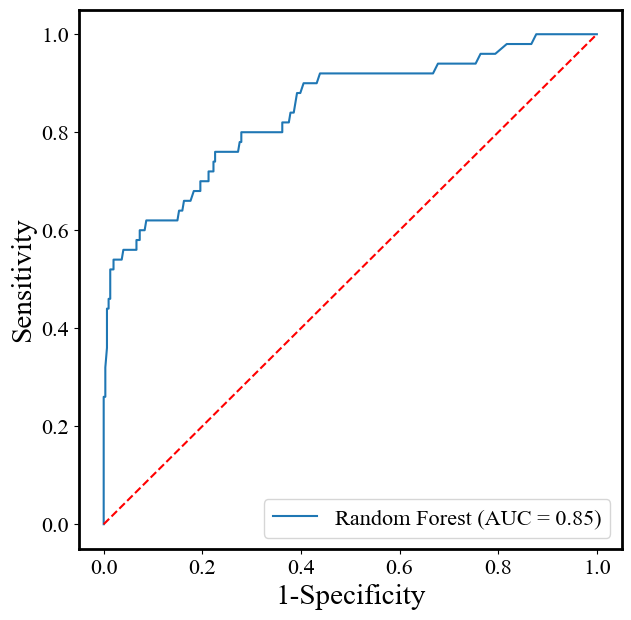

{'auc': 0.85, 'acc': 0.81, 'recall_1': 0.84, 'recall_2': 0.62, 'precision_1': 0.93, 'precision_2': 0.39}


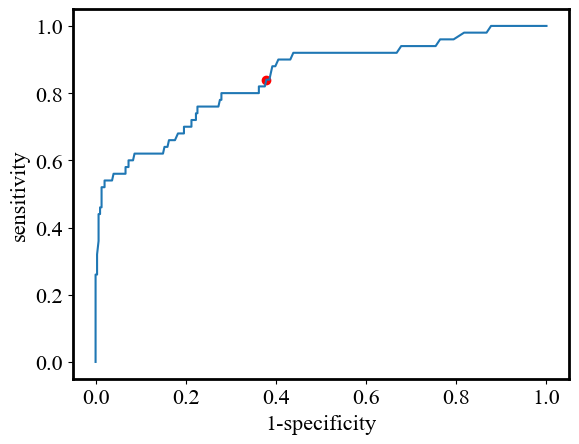

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       301
           1       0.85      0.46      0.60        50

    accuracy                           0.91       351
   macro avg       0.88      0.72      0.77       351
weighted avg       0.91      0.91      0.90       351

{'feature_selection_method': SelectKBest(k=300, score_func=<function chi2 at 0x1396e9d30>), 'feature_selection_method__k': 300}
[[297   4]
 [ 27  23]]
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------


In [18]:
for i in classes:
    print("\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\// " + i + " \\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//\\//")
    y = df[i].replace(['S','I','R',], [0,1,1]).values
    y = np.reshape(y, (y.size, 1))

    df_temp = np.concatenate((X_der.copy(), y), axis=1)
    df_temp = pd.DataFrame(df_temp).dropna()
    X_temp = df_temp.iloc[:, :-1].values
    y_temp = df_temp.iloc[:, -1].values.astype(int)
    
    model = DeepClassification(X_temp, y_temp, classifier=classifiers[Classifier])
    model.grid_search(sacrifice_rate=Sacrifice, n_features_list=[50, 100, 150, 200, 250, 300, 350, 400, "all"])
    model.k_folds(shuffle=True, random_state=100, confidence_interval=True)
    model.show_roc()
    plt.show()
    print(model.optimal_cut_point_on_roc(delta_max=delta, plot_point_on_ROC=True))
    plt.show()
    print(model.class_report_)
    print(model.best_parameters_)
    print(model.confusion_mat_)
    print("-----------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------")